In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df=pd.read_csv('D:\\！course-aalto\\analysis and data science\\TimeSeriesAnalysis\\code\\UDEMY_TSA_FINAL\\Data\\airline_passengers.csv',index_col=0,parse_dates=True)

In [6]:
df.index.freq="MS"

In [9]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [18]:
train=df.iloc[:109]
test=df.iloc[108:]

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [47]:
fitted_model=ExponentialSmoothing(train['Thousands of Passengers'].astype('double'),
                                 trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [48]:
test_pred=fitted_model.forecast(36)

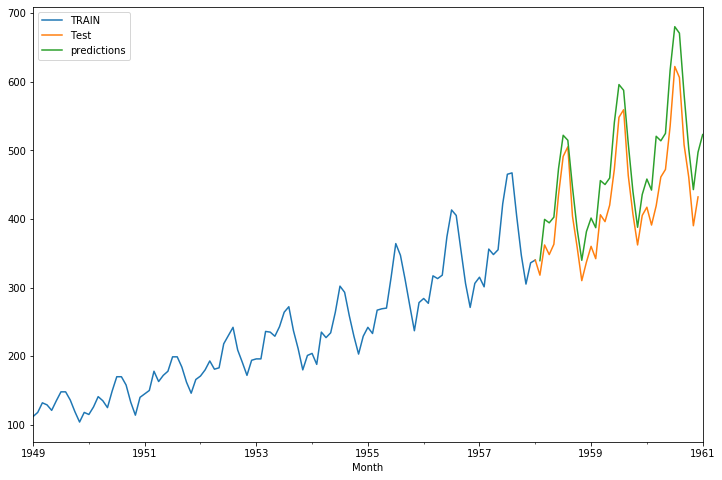

In [50]:
train['Thousands of Passengers'].plot(legend=True,label="TRAIN",figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True,label="Test",figsize=(12,8))
test_pred.plot(legend=True,label="predictions")

# evaluating forecast predictions

1 mean absolute error (MAE)
2 mean squared error (MSE): larger errors are noted more than with MAE,making MSE more popular
3 root mean square error (RMSE) 保留了原来的单位unite,比如dollars

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
test_pred.describe()

count     36.000000
mean     478.307361
std       85.573276
min      339.137622
25%      402.204275
50%      458.768990
75%      522.066231
max      680.014242
dtype: float64

In [58]:
mean_absolute_error(test,test_pred)

63.0282862810754

In [60]:
np.sqrt(mean_squared_error(test,test_pred)) # this is less than the original std, so it fits well

74.92554879648945

In [64]:
final_model=ExponentialSmoothing(df['Thousands of Passengers'].astype('double'),
                                 trend='mul',seasonal='mul',seasonal_periods=12).fit()
pred=final_model.forecast(36)

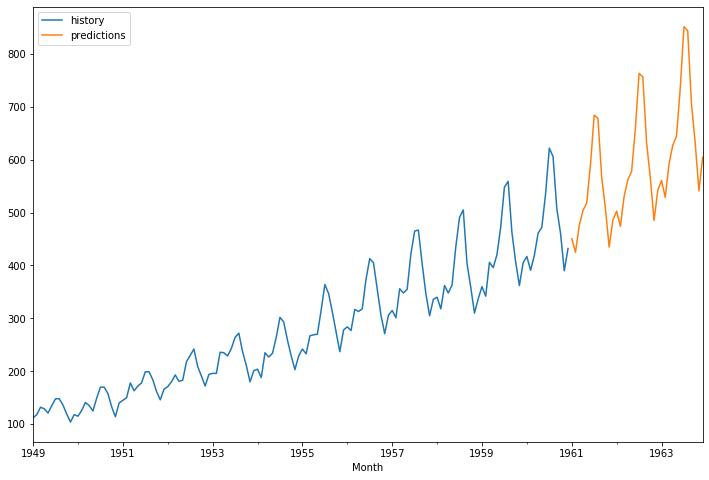

In [68]:
df['Thousands of Passengers'].plot(legend=True,label="history",figsize=(12,8))
pred.plot(legend=True,label="predictions")

In [69]:
df2=pd.read_csv('D:\\！course-aalto\\analysis and data science\\TimeSeriesAnalysis\\code\\UDEMY_TSA_FINAL\\Data\\samples.csv',index_col=0,parse_dates=True)

In [71]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


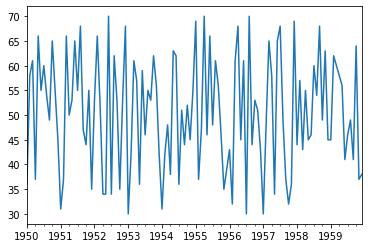

In [73]:
df2['a'].plot()

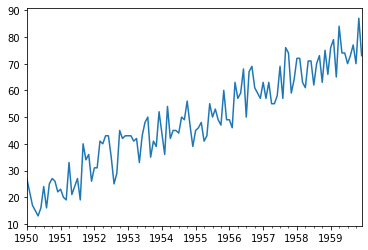

In [75]:
df2['b'].plot()

In [76]:
from statsmodels.tsa.statespace.tools import diff

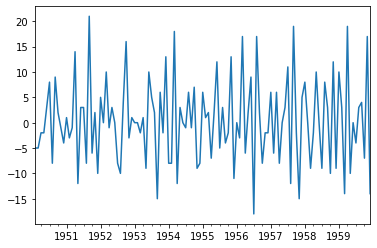

In [81]:
# df2['b']-df2['b'].shift(1)
diff(df2['b'],k_diff=1).plot()

# ACF and PACF
# Autocorrelation Function / Partial Autocorrelation Function
Before we can investigate <em>autoregression</em> as a modeling tool, we need to look at <em>covariance</em> and <em>correlation</em> as they relate to lagged (shifted) samples of a time series.


### Goals
 * Be able to create ACF and PACF charts
 * Create these charts for multiple times series, one with seasonality and another without
 * Be able to calculate Orders PQD terms for ARIMA off these charts (highlight where they cross the x axis)
 
<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acovf.html'>stattools.acovf</a></strong><font color=black>(x[, unbiased, demean, fft, …])</font>&nbsp;Autocovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html'>stattools.acf</a></strong><font color=black>(x[, unbiased, nlags, qstat, …])</font>&nbsp;&nbsp;Autocorrelation function for 1d arrays<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html'>stattools.pacf</a></strong><font color=black>(x[, nlags, method, alpha])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_yw.html'>stattools.pacf_yw</a></strong><font color=black>(x[, nlags, method])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated with non-recursive yule_walker<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_ols.html'>stattools.pacf_ols</a></strong><font color=black>(x[, nlags])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate partial autocorrelations</tt>
   
<h3>Related Plot Methods:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html'>tsaplots.plot_acf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;&nbsp;Plot the autocorrelation function<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html'>tsaplots.plot_pacf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;Plot the partial autocorrelation function</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Autocovariance'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Autocovariance</font><br>
<strong>
<a href='https://otexts.com/fpp2/autocorrelation.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autocorrelation</font><br>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm'>NIST Statistics Handbook</a></strong>&nbsp;&nbsp;<font color=black>Partial Autocorrelation Plot</font></div>


In [84]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols